# Flight Status Prediction - Model Evaluation

In [1]:
# importing the all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
import math
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier



In [2]:
#Fetching Cleaned Data after pre processing
proj = pd.read_csv('cleaned_project_data.csv', sep=',')
target_feature = ['Cancelled']
included_features = ["Airline","Flight_Number_Marketing_Airline","Origin","Dest","Cancelled","Diverted","CRSDepTime","DepTime","DepDelayMinutes",
    "TaxiOut","TaxiIn","CRSArrTime","ArrTime","ArrDelayMinutes"]
target= proj['Cancelled']
proj=proj.loc[:, proj.columns.isin(included_features)]
proj.drop(columns=["Cancelled"],axis=1,inplace=True)
proj.head()

,Airline,Origin,Dest,Diverted,CRSDepTime,DepTime,DepDelayMinutes,ArrTime,ArrDelayMinutes,Flight_Number_Marketing_Airline,TaxiOut,TaxiIn,CRSArrTime
0,Capital Cargo International,CLT,EVV,False,0.000000,0.852500,0.0,0.892500,0.0,0.725451,0.776471,0.25,0.909245
1,Delta Air Lines Inc.,DFW,LGA,False,0.000000,0.801667,0.0,0.977917,0.4,0.066943,0.447059,0.45,0.994063
2,Alaska Airlines Inc.,SEA,ABQ,False,0.000000,0.475000,0.0,0.636250,0.0,0.088417,0.517647,0.20,0.658609
3,American Airlines Inc.,FLL,CLT,False,0.000000,0.717500,1.0,0.796667,1.0,0.161478,0.235294,0.60,0.000000
4,American Airlines Inc.,DCA,BOS,False,0.684478,0.717500,1.0,0.796667,0.0,0.257453,1.000000,0.45,0.524597


#### Ordinal Encoding on descriptive features of categorical type

In [3]:
#  Using OrdinalEncoder of sklearn to transform categorical variables into   ordered set of integers
descFeatures = ["Airline","Flight_Number_Marketing_Airline","Origin","Dest","Diverted",
    "CRSDepTime","DepTime","DepDelayMinutes",
    "TaxiOut","TaxiIn","CRSArrTime","ArrTime","ArrDelayMinutes"]
encodeVal=OrdinalEncoder().fit_transform(proj)
trainData=pd.DataFrame(encodeVal,columns=descFeatures) #Array to dataframe conversion
trainData

,Airline,Flight_Number_Marketing_Airline,Origin,Dest,Diverted,CRSDepTime,DepTime,DepDelayMinutes,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes
0,4.0,73.0,117.0,0.0,0.0,6477.0,0.0,3071.0,0.0,6025.0,37.0,8.0,1450.0
1,7.0,96.0,203.0,0.0,0.0,6357.0,0.0,3412.0,148.0,557.0,21.0,14.0,1594.0
2,1.0,315.0,2.0,0.0,0.0,3988.0,0.0,1902.0,0.0,735.0,24.0,4.0,1000.0
3,3.0,127.0,73.0,0.0,0.0,5972.0,10472.0,2667.0,300.0,1343.0,11.0,17.0,0.0
4,3.0,92.0,46.0,0.0,734.0,5972.0,10472.0,2667.0,0.0,2143.0,48.0,14.0,747.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5.0,267.0,145.0,0.0,692.0,5334.0,0.0,2346.0,300.0,5061.0,35.0,10.0,1128.0
99996,17.0,44.0,252.0,0.0,236.0,2700.0,0.0,1001.0,0.0,5899.0,18.0,17.0,530.0
99997,0.0,253.0,228.0,0.0,609.0,4863.0,0.0,1769.0,0.0,3866.0,12.0,24.0,951.0
99998,18.0,95.0,169.0,0.0,484.0,4261.0,10472.0,1923.0,84.0,2930.0,12.0,3.0,981.0


### chi-square test for feature selection

Feature selection score for  Airline  is : 390.7798467686032
Feature selection score for  Flight_Number_Marketing_Airline  is : 6704.152791298588
Feature selection score for  Origin  is : 9347.237211830112
Feature selection score for  Dest  is : 1674.535095223378
Feature selection score for  Diverted  is : 7656134.123586537
Feature selection score for  CRSDepTime  is : 11149508.346735531
Feature selection score for  DepTime  is : 1029167.6684638232
Feature selection score for  DepDelayMinutes  is : 10963892.196065184
Feature selection score for  TaxiOut  is : 1451674.4043545313
Feature selection score for  TaxiIn  is : 459206.38272039045
Feature selection score for  CRSArrTime  is : 356719.085121058
Feature selection score for  ArrTime  is : 199668.22110228345
Feature selection score for  ArrDelayMinutes  is : 4484770.681277152


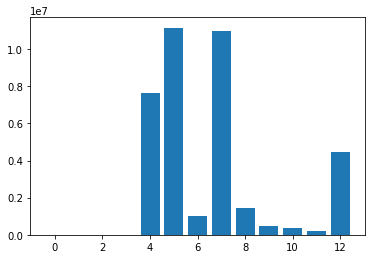

In [4]:
featureSel = SelectKBest(score_func=chi2, k=9)
featureSel.fit(trainData,target)

for a,b in zip(descFeatures,featureSel.scores_):
    print("Feature selection score for ",a," is :",b)

#bar plot for feature selection scores
plt.bar([i for i in range(len(featureSel.scores_))], featureSel.scores_)
plt.show()

### Extremely Randomized Trees Classifier(Extra Trees Classifier) for feature selection

[0.01916381 0.02444077 0.02446455 0.02552387 0.12048366 0.03113511
 0.04090933 0.07532645 0.06487634 0.03321212 0.20938338 0.23029129
 0.10078934]


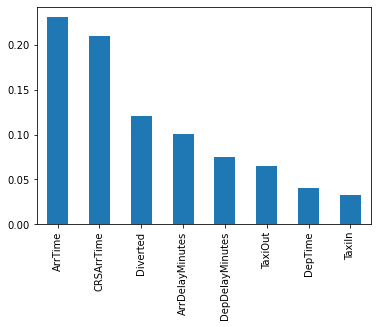

In [5]:
# ExtraTreesClassifier from sklearn library to find the most important features from the descriptive fetures 
ETClassifier = ExtraTreesClassifier()
ETClassifier.fit(trainData,target)
print(ETClassifier.feature_importances_) #feature_importances is inbuilt function of tree based classifier

feat_importances = pd.Series(ETClassifier.feature_importances_, index=descFeatures)
feat_importances.nlargest(8).plot(kind='bar')
plt.show() #bar graph to depict the feature importance of each descriptive feature.

### Splitting the Dataset for Training(67%) and Testing (33%)

In [6]:
# splitting the data using train_test_split library from sklearn with testing size as 33%

train_features, test_features, train_labels, test_labels = train_test_split(trainData[descFeatures], target, test_size = 0.33,stratify=target, random_state = 577)
print('Training Features Size: ',train_labels.size)
print('Testing Features Size: ',test_labels.size)
train_features

Training Features Size:  67000
Testing Features Size:  33000


,Airline,Flight_Number_Marketing_Airline,Origin,Dest,Diverted,CRSDepTime,DepTime,DepDelayMinutes,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes
87591,18.0,215.0,216.0,0.0,0.0,4992.0,10472.0,2511.0,300.0,3063.0,32.0,13.0,1157.0
29617,3.0,348.0,252.0,0.0,0.0,5263.0,7619.0,2259.0,300.0,642.0,13.0,19.0,0.0
49870,3.0,305.0,96.0,0.0,119.0,0.0,3537.0,993.0,0.0,2262.0,0.0,0.0,323.0
7063,8.0,56.0,104.0,0.0,0.0,5355.0,10472.0,2845.0,300.0,4730.0,25.0,4.0,0.0
93936,18.0,216.0,95.0,0.0,0.0,2403.0,1308.0,1201.0,0.0,1511.0,11.0,11.0,682.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96975,14.0,127.0,119.0,0.0,689.0,0.0,0.0,0.0,0.0,604.0,0.0,0.0,1214.0
47229,7.0,203.0,252.0,0.0,119.0,0.0,0.0,0.0,0.0,554.0,0.0,0.0,350.0
61054,7.0,203.0,252.0,0.0,384.0,5379.0,1659.0,3476.0,0.0,315.0,0.0,0.0,715.0
81687,9.0,6.0,96.0,0.0,894.0,2312.0,7803.0,2157.0,0.0,4322.0,0.0,0.0,1309.0


# Different Models Evaluation

#### 1. Guassian Navie Bayes

In [7]:
# calling GaussianNB() method from sklearn library to train and predict the accuracy of testing data
GNB = GaussianNB() 
GNB.fit(train_features,train_labels) #predicting the label values for all feature values of testing data
test_pred = pd.DataFrame(GNB.predict(test_features),columns=["Cancelled"]) 
test_pred

,Cancelled
0,False
1,False
2,True
3,False
4,False
...,...
32995,True
32996,True
32997,False
32998,False


In [8]:
#Calling accuracy_score() from metric class of sklearn library
accuracy = accuracy_score(test_labels, test_pred) 
print("Guassian Navie Bayes accuracy score : ",accuracy)
print("Guassian Navie Bayes Priors are : ",GNB.class_prior_) #GNB Priors

Guassian Navie Bayes accuracy score :  0.8758787878787879
Guassian Navie Bayes Priors are :  [0.65935821 0.34064179]


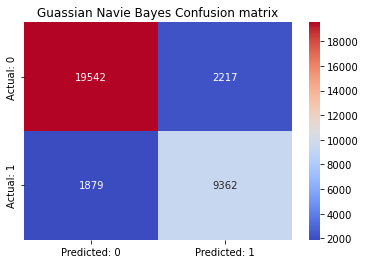

In [9]:
# Visual representation of Confusion matrix of GNB
x_axis = ['Predicted: 0','Predicted: 1']
y_axis = ['Actual: 0','Actual: 1']
sns.heatmap(confusion_matrix(test_labels,test_pred), annot=True,fmt="d",cmap='coolwarm', xticklabels=x_axis, yticklabels=y_axis)
plt.title('Guassian Navie Bayes Confusion matrix')
plt.show()

In [10]:
#Getting TP,TN,FP,FN values from confusion matrix
cm=confusion_matrix(test_labels,test_pred)
def TPTN(cmat):
    TN = cmat[0,0]
    FP = cmat[0,1]
    FN = cmat[1,0]
    TP = cmat[1,1]
    return TN,FP,FN,TP
TN,FP,FN,TP=TPTN(cm)
cm

array([[19542,  2217],
       [ 1879,  9362]], dtype=int64)

### Evaluation metrics that are not implemented in the standard libraries 

In [11]:
# defining a set of array's for each metric type.
# For each model evaluation the metric scores are pushed to array and finally used to compare every model
allAccuracy=[]
allPrecision=[]
allF1Score=[]
allRecall=[]
allTrueSkillStatistic=[]
allHeidkeSkillScore=[]
allBalancedAccuracy=[]
allYoudenIndex=[]

a={1:0.728693,2:0.728692,3:0.728686,4:0.728678,5:0.728616,6:0.727908,7:0.727122,8:0.720862,9:0.616463,10:0.531713}
trainAUC=pd.Series(a)
b={1:-5.00000,2:-4.00000,3:-3.30103,4:-3.00000,5:-2.30103,6:-1.30103,7:-1.00000,8:-0.30103,9:1.00000,10:2.00000}
alphaVal=pd.Series(b)
Models=['GaussianNB','Logistic Regression','RandomForest','AdaBoost','KNeighbors']
cv={1:0.662078,4:0.662077,2:0.662073,6:0.662067,9:0.662021,7:0.661533,8:0.661014,5:0.656868,3:0.581507,0:0.525193}
cvAUC=pd.Series(cv)

In [12]:
# functions to caluclate the score for each metric - these functions will be called after each metric is evaluated
# and values are pushed to its respective array
def Accuracy(cm):
    TN,FP,FN,TP=TPTN(cm)
    return (TP+TN)/(TP+TN+FP+FN)

def Precision(cm):
    TN,FP,FN,TP=TPTN(cm)
    return TP/(TP+FP)

def Recall(cm):
    TN,FP,FN,TP=TPTN(cm)
    return TP/(TP+FN)

def F1Score(cm):
    TN,FP,FN,TP=TPTN(cm)
    a=Precision(cm)*Recall(cm)
    b=Precision(cm)+Recall(cm)
    return 2*a/b

def BalancedAccuracy(cm):
    TN,FP,FN,TP=TPTN(cm)
    a=TP+TN
    b=TP+FP+TN+FN
    return (a/(2*b))

def HeidkeSkillScore(cm):
    TN,FP,FN,TP=TPTN(cm)
    a=2*((TP*TN)-(FN*FP))
    b=((TP+FN)*(FN+TN)) + ((FP+TN)*(TP+FP))
    return a/b

def YoudenIndex(cm):
    TN,FP,FN,TP=TPTN(cm)
    a=(TP*TN-FN*FP)
    b=(TP+FN)*(FP+TN)
    return a/b

def TrueSkillStatistic(cm):
    TN,FP,FN,TP=TPTN(cm)
    return(TP/(TP+FN))-(FP/(TN+FP))
    

    
allAccuracy.append(Accuracy(cm))
allPrecision.append(Precision(cm))
allF1Score.append(F1Score(cm))
allRecall.append(Recall(cm))
allTrueSkillStatistic.append(TrueSkillStatistic(cm))
allHeidkeSkillScore.append(HeidkeSkillScore(cm))
allBalancedAccuracy.append(BalancedAccuracy(cm))
allYoudenIndex.append(YoudenIndex(cm))

In [13]:
# printting classification report to validate our metrics 
print(classification_report(test_labels, test_pred, labels=[1, 2,3,4]))

              precision    recall  f1-score   support

           1       0.81      0.83      0.82     11241
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.81      0.83      0.82     11241
   macro avg       0.20      0.21      0.21     11241
weighted avg       0.81      0.83      0.82     11241



### Hyper parameter tuning

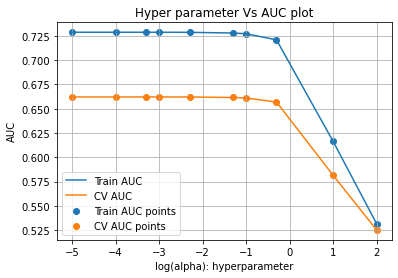

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.064579,0.011552,0.036392,0.005461,0.00001,{'alpha': 1e-05},0.741012,0.74287,0.741863,0.741915,0.00076,6,0.742534,0.742156,0.741199,0.741963,0.000562
2,0.078851,0.003738,0.035514,0.001801,0.0001,{'alpha': 0.0001},0.741012,0.74287,0.741863,0.741915,0.00076,6,0.742534,0.742156,0.741199,0.741963,0.000562
1,0.078053,0.011562,0.039354,0.003244,0.0005,{'alpha': 0.0005},0.741012,0.74287,0.741863,0.741915,0.00076,6,0.742534,0.742156,0.741199,0.741963,0.000562
4,0.064323,0.001732,0.034573,0.003609,0.001,{'alpha': 0.001},0.741012,0.74287,0.741863,0.741915,0.00076,6,0.742534,0.742156,0.741199,0.741963,0.000562
3,0.070142,0.004256,0.040784,0.003617,0.005,{'alpha': 0.005},0.741012,0.74287,0.741863,0.741915,0.00076,6,0.742534,0.742156,0.741199,0.741963,0.000562


In [14]:
# implementing grid searchhyper parameter tuning 
MNB = MultinomialNB(fit_prior=False, class_prior=[0.5,0.5])
params = {'alpha': [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
classification = GridSearchCV(MNB, params, cv=3, scoring='roc_auc', n_jobs=-1,return_train_score=True)
classification.fit(train_features, train_labels)

results = pd.DataFrame.from_dict(classification.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
alpha =  np.log10(results['param_alpha'].astype('float64'))

plt.plot(alphaVal, trainAUC, label='Train AUC')
plt.plot(alphaVal, cvAUC, label='CV AUC')

plt.scatter(alphaVal, trainAUC, label='Train AUC points')
plt.scatter(alphaVal, cvAUC, label='CV AUC points')


plt.legend()
plt.xlabel("log(alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

#### 2. Logistic Regression

In [20]:
# calling LogisticRegression() method from sklearn library to train and predict the accuracy of testing data
LOR= LogisticRegression(random_state=577,solver='lbfgs', max_iter=5000) 
LOR.fit(train_features,train_labels) # Training the data with logistic regression
test_pred = pd.DataFrame(LOR.predict(test_features),columns=["Cancelled"]) 
test_pred

,Cancelled
0,False
1,False
2,True
3,False
4,False
...,...
32995,True
32996,True
32997,False
32998,False


In [16]:
accuracy = accuracy_score(test_labels, test_pred) 
print("LogisticRegression accuracy score : ",accuracy)

LogisticRegression accuracy score :  0.9013636363636364


#### ROC AUC Curve

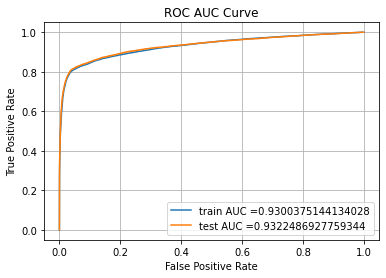

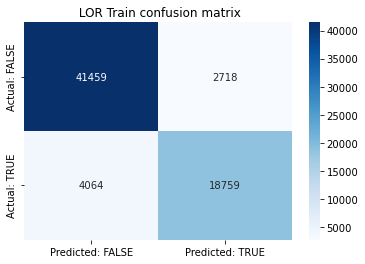

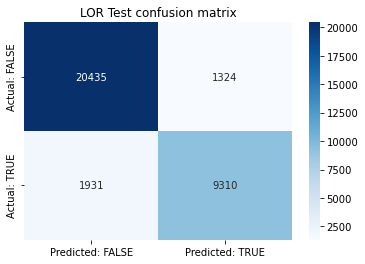

In [17]:
train_pred = LOR.predict_proba(train_features)[:,1]   
test_pred =  LOR.predict_proba(test_features)[:,1] 
train_fpr, train_tpr, train_thresholds = roc_curve(train_labels, train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(test_labels, test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve")
plt.grid()
plt.show()

x_axis = ['Predicted: FALSE','Predicted: TRUE']
y_axis = ['Actual: FALSE','Actual: TRUE']
sns.heatmap(confusion_matrix(train_labels, LOR.predict(train_features)), annot=True,fmt="d",cmap='Blues', xticklabels=x_axis, yticklabels=y_axis)
plt.title(' LOR Train confusion matrix')
plt.show()
sns.heatmap(confusion_matrix(test_labels,LOR.predict(test_features)), annot=True,fmt="d",cmap='Blues', xticklabels=x_axis, yticklabels=y_axis)
plt.title('LOR Test confusion matrix')
plt.show()

### HyperParameter tuning For Logistic Regression

In [18]:
import warnings
warnings.filterwarnings("ignore")
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-2,2,4),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

logreg = LogisticRegression(max_iter=5000)
logclf = GridSearchCV(logreg,                   
                   param_grid = parameters,   
                   scoring='accuracy',        
                   cv=10)
logclf.fit(train_features,train_labels)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([1.00000000e-02, 2.15443469e-01, 4.64158883e+00, 1.00000000e+02]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [19]:
print("Tuned Hyperparameters :", logclf.best_params_)
print("Accuracy after hyperparameter tuning :",logclf.best_score_)

Tuned Hyperparameters : {'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy after hyperparameter tuning : 0.902179104477612


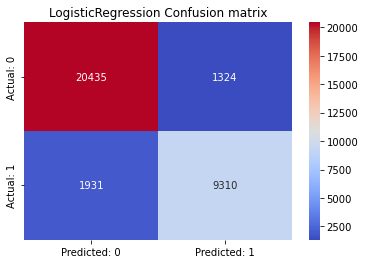

In [21]:
# Visual representation of Confusion matrix of LogisticRegression
x_axis = ['Predicted: 0','Predicted: 1']
y_axis = ['Actual: 0','Actual: 1']
sns.heatmap(confusion_matrix(test_labels,test_pred), annot=True,fmt="d",cmap='coolwarm', xticklabels=x_axis, yticklabels=y_axis)
plt.title('LogisticRegression Confusion matrix')
plt.show()

In [22]:
cm=confusion_matrix(test_labels,test_pred)

allAccuracy.append(Accuracy(cm))
allPrecision.append(Precision(cm))
allF1Score.append(F1Score(cm))
allRecall.append(Recall(cm))
allTrueSkillStatistic.append(TrueSkillStatistic(cm))
allHeidkeSkillScore.append(HeidkeSkillScore(cm))
allBalancedAccuracy.append(BalancedAccuracy(cm))
allYoudenIndex.append(YoudenIndex(cm))

#### 3. Random Forest Classification

In [23]:
# calling RandomForestClassifier() method from sklearn library to train and predict the accuracy of testing data

RFC = RandomForestClassifier(n_estimators = 4,max_depth = 3) 
 
RFC.fit(train_features, train_labels)
 
# performing predictions on the test dataset
test_pred = RFC.predict(test_features)
 
print(" RandomForestClassifier ACCURACY : ", accuracy_score(test_labels, test_pred))

 RandomForestClassifier ACCURACY :  0.9141212121212121


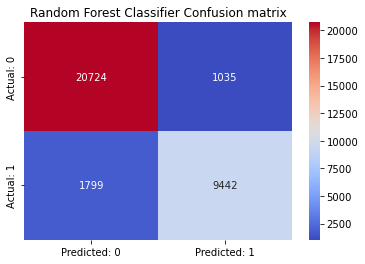

In [24]:
# Visual representation of Confusion matrix of Random Forest Classifier
x_axis = ['Predicted: 0','Predicted: 1']
y_axis = ['Actual: 0','Actual: 1']
sns.heatmap(confusion_matrix(test_labels,test_pred), annot=True,fmt="d",cmap='coolwarm', xticklabels=x_axis, yticklabels=y_axis)
plt.title('Random Forest Classifier Confusion matrix')
plt.show()

In [25]:
cm=confusion_matrix(test_labels,test_pred)

allAccuracy.append(Accuracy(cm))
allPrecision.append(Precision(cm))
allF1Score.append(F1Score(cm))
allRecall.append(Recall(cm))
allTrueSkillStatistic.append(TrueSkillStatistic(cm))
allHeidkeSkillScore.append(HeidkeSkillScore(cm))
allBalancedAccuracy.append(BalancedAccuracy(cm))
allYoudenIndex.append(YoudenIndex(cm))

#### 4. AdaBoost Classification

In [26]:
# calling AdaBoostClassifier() method from sklearn library to train and predict the accuracy of testing data
ABC = AdaBoostClassifier(n_estimators=150,learning_rate=2,base_estimator=RFC)

pred = ABC.fit(train_features, train_labels)

#Predict the response for test dataset
test_Pred = pred.predict(test_features)
accuracy = accuracy_score(test_labels, test_pred)
print(' AdaBoostClassifier Accuracy : ',accuracy)

 AdaBoostClassifier Accuracy :  0.9141212121212121


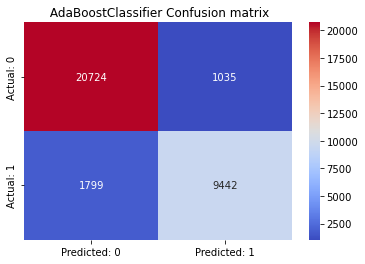

In [27]:
x_axis = ['Predicted: 0','Predicted: 1']
y_axis = ['Actual: 0','Actual: 1']
sns.heatmap(confusion_matrix(test_labels,test_pred), annot=True,fmt="d",cmap='coolwarm', xticklabels=x_axis, yticklabels=y_axis)
plt.title(' AdaBoostClassifier Confusion matrix')
plt.show()

In [28]:
cm=confusion_matrix(test_labels,test_pred)

allAccuracy.append(Accuracy(cm))
allPrecision.append(Precision(cm))
allF1Score.append(F1Score(cm))
allRecall.append(Recall(cm))
allTrueSkillStatistic.append(TrueSkillStatistic(cm))
allHeidkeSkillScore.append(HeidkeSkillScore(cm))
allBalancedAccuracy.append(BalancedAccuracy(cm))
allYoudenIndex.append(YoudenIndex(cm))

#### 5. K-Nearest Neighbor

In [29]:
# calling KNeighborsClassifier() method from sklearn library to train and predict the accuracy of testing data
KNN = KNeighborsClassifier(n_neighbors=6)
KNN.fit(train_features, train_labels)
test_pred = KNN.predict(test_features)
accuracy = accuracy_score(test_labels, test_pred)
print('Accuracy of our model is equal ',accuracy)

Accuracy of our model is equal  0.8373939393939394


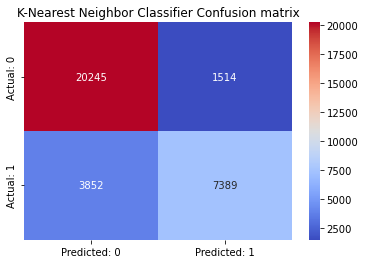

In [30]:
x_axis = ['Predicted: 0','Predicted: 1']
y_axis = ['Actual: 0','Actual: 1']
sns.heatmap(confusion_matrix(test_labels,test_pred), annot=True,fmt="d",cmap='coolwarm', xticklabels=x_axis, yticklabels=y_axis)
plt.title('K-Nearest Neighbor Classifier Confusion matrix')
plt.show()

In [31]:
cm=confusion_matrix(test_labels,test_pred)

allAccuracy.append(Accuracy(cm))
allPrecision.append(Precision(cm))
allF1Score.append(F1Score(cm))
allRecall.append(Recall(cm))
allTrueSkillStatistic.append(TrueSkillStatistic(cm))
allHeidkeSkillScore.append(HeidkeSkillScore(cm))
allBalancedAccuracy.append(BalancedAccuracy(cm))
allYoudenIndex.append(YoudenIndex(cm))

In [32]:
allModels = list(zip(allAccuracy,allPrecision,allF1Score,allRecall,allTrueSkillStatistic,allHeidkeSkillScore,allBalancedAccuracy,allYoudenIndex))


In [33]:
allModelComparison=pd.DataFrame(allModels, columns=['Accuracy','Precision','F1Score','Recall','TrueSkillStatistic','HeidkeSkillScore','BalancedAccuracy','YoudenIndex'],index=['GaussianNB',' Logistic Regression','RandomForest','AdaBoost','KNeighbors'])

In [34]:
#df with all evaluation metrics for every model
allModelComparison

,Accuracy,Precision,F1Score,Recall,TrueSkillStatistic,HeidkeSkillScore,BalancedAccuracy,YoudenIndex
GaussianNB,0.875879,0.808533,0.820508,0.832844,0.730955,0.725681,0.437939,0.730955
Logistic Regression,0.901364,0.875494,0.851200,0.828218,0.767370,0.777517,0.450682,0.767370
RandomForest,0.914121,0.901212,0.869509,0.839961,0.792394,0.805628,0.457061,0.792394
AdaBoost,0.914121,0.901212,0.869509,0.839961,0.792394,0.805628,0.457061,0.792394
KNeighbors,0.837394,0.829945,0.733618,0.657326,0.587745,0.618855,0.418697,0.587745


<AxesSubplot:>

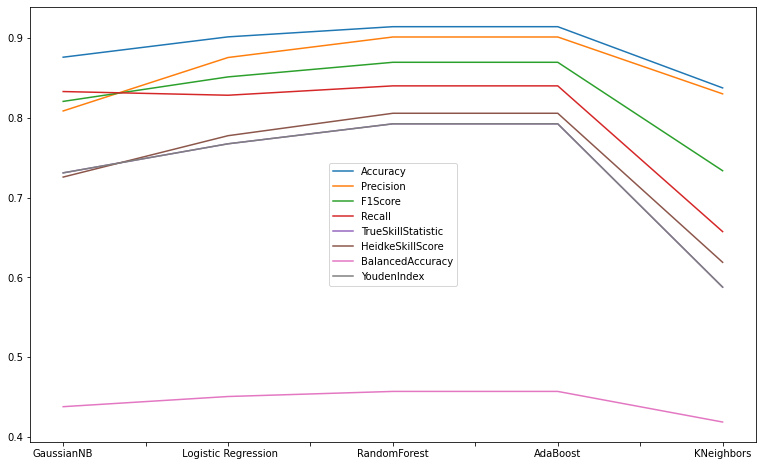

In [35]:
allModelComparison.plot.line(figsize=(13,8))

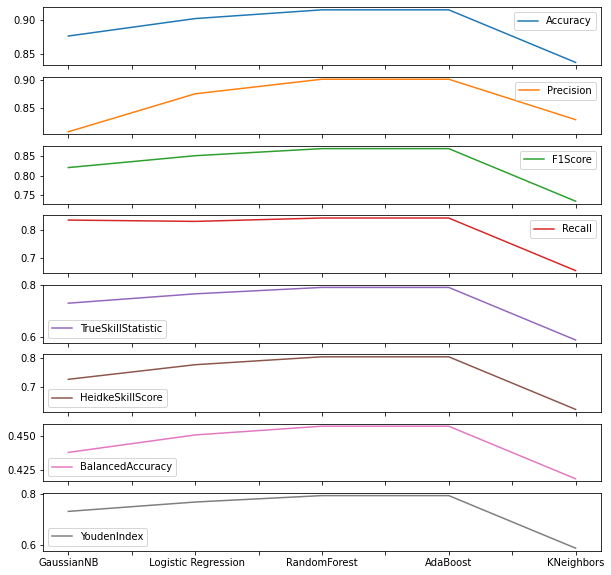

In [36]:
axes = allModelComparison.plot.line(subplots=True,figsize=(10,10))

<AxesSubplot:xlabel='index'>

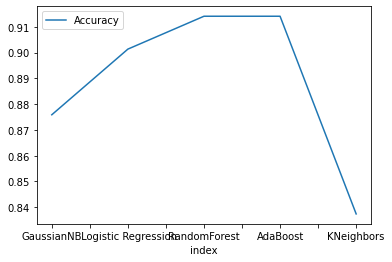

In [37]:
allModelComparison.reset_index().plot.line(x='index', y='Accuracy')

<AxesSubplot:xlabel='index'>

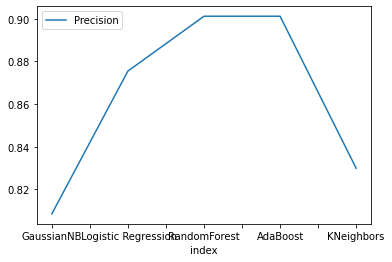

In [38]:
allModelComparison.reset_index().plot.line(x='index', y='Precision')

<AxesSubplot:xlabel='index'>

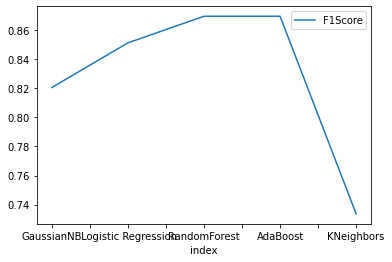

In [39]:
allModelComparison.reset_index().plot.line(x='index', y='F1Score')

<AxesSubplot:xlabel='index'>

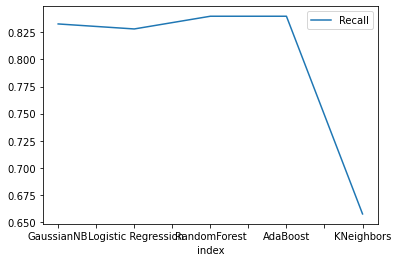

In [40]:
allModelComparison.reset_index().plot.line(x='index', y='Recall')

<AxesSubplot:xlabel='index'>

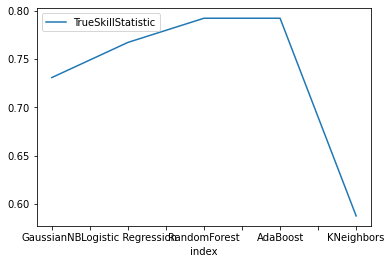

In [41]:
allModelComparison.reset_index().plot.line(x='index', y='TrueSkillStatistic')

<AxesSubplot:xlabel='index'>

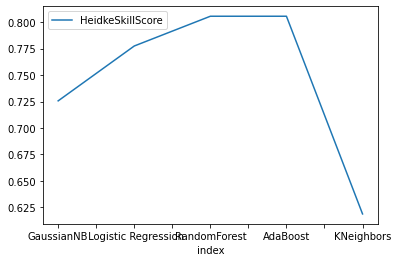

In [42]:
allModelComparison.reset_index().plot.line(x='index', y='HeidkeSkillScore')

<AxesSubplot:xlabel='index'>

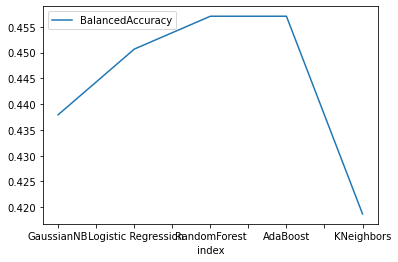

In [43]:
allModelComparison.reset_index().plot.line(x='index', y='BalancedAccuracy')

<AxesSubplot:xlabel='index'>

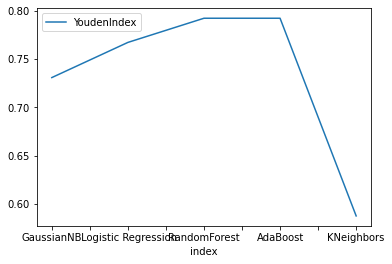

In [44]:
allModelComparison.reset_index().plot.line(x='index', y='YoudenIndex')